In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Animation_Movies.csv",
                delimiter = ",").dropna().reset_index(drop = True)

# Opis zbioru danych

In [12]:
print(f"Liczba wierszy: {df.shape[0]}")
print(f"Liczba kolumn: {df.shape[1]}")

Liczba wierszy: 916
Liczba kolumn: 23


In [13]:
print("\nŁączna liczba braków danych:", df.isnull().sum().sum())


Łączna liczba braków danych: 0


In [17]:
print("Typy zmiennnych w poszczególnych kolumnach:")
df.dtypes


Typy zmiennnych w poszczególnych kolumnach:


id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
dtype: object

# Analiza zmiennych i statystyki

In [ ]:
cols1 = df[["vote_average", "vote_count", "revenue", "runtime", "popularity"]]
for col in cols1:
    print(f"\nStatystyki dla zmiennej: {col}")
    print(f"Średnia: {df[col].mean()}")
    print(f"Mediana: {df[col].median()}")
    print(f"Wariancja: {df[col].var()}")
    print(f"Odchylenie standardowe: {df[col].std()}")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print(f"Ilość unikalnych wartości: {df[col].nunique()}")



Statystyki dla zmiennej: vote_average
Średnia: 6.5119486899563315
Mediana: 6.9005
Wariancja: 3.3289073143042924
Odchylenie standardowe: 1.8245293404887444
Min: 0.0
Max: 10.0
Ilość unikalnych wartości: 564

Statystyki dla zmiennej: vote_count
Średnia: 1416.8155021834061
Mediana: 154.0
Wariancja: 9223021.51018565
Odchylenie standardowe: 3036.9427900745263
Min: 0
Max: 19463
Ilość unikalnych wartości: 545

Statystyki dla zmiennej: revenue
Średnia: 79691579.83078602
Mediana: 0.0
Wariancja: 3.873033596790943e+16
Odchylenie standardowe: 196800243.82075706
Min: 0
Max: 1450026933
Ilość unikalnych wartości: 378

Statystyki dla zmiennej: runtime
Średnia: 75.91812227074236
Mediana: 86.0
Wariancja: 1046.5692449948697
Odchylenie standardowe: 32.35072248026108
Min: 0
Max: 210
Ilość unikalnych wartości: 129

Statystyki dla zmiennej: popularity
Średnia: 24.118115720524017
Mediana: 13.1365
Wariancja: 2719.7665878292173
Odchylenie standardowe: 52.151381456575216
Min: 0.6
Max: 1008.942
Ilość unikalnych w

Tutaj nie dołączam kluczowych wniosków, bo tylko kluczowe statystyki są ładnie wypisane powyżej i poniżej.



In [25]:
cols2 = df[["status", "adult", "original_language", "production_companies", "spoken_languages"]]
for col in cols2:
    print(f"\nAnaliza zmiennej kategorycznej: {col}")
    print(f"Liczba unikalnych kategorii: {df[col].nunique()}")
    print(f"Najczęstsza kategoria: {df[col].mode()[0]}")



Analiza zmiennej kategorycznej: status
Liczba unikalnych kategorii: 3
Najczęstsza kategoria: Released

Analiza zmiennej kategorycznej: adult
Liczba unikalnych kategorii: 1
Najczęstsza kategoria: False

Analiza zmiennej kategorycznej: original_language
Liczba unikalnych kategorii: 30
Najczęstsza kategoria: en

Analiza zmiennej kategorycznej: production_companies
Liczba unikalnych kategorii: 712
Najczęstsza kategoria: Pixar, Walt Disney Pictures

Analiza zmiennej kategorycznej: production_companies
Liczba unikalnych kategorii: 712
Najczęstsza kategoria: Pixar, Walt Disney Pictures

Analiza zmiennej kategorycznej: spoken_languages
Liczba unikalnych kategorii: 107
Najczęstsza kategoria: English


# Analiza z GroupBy

In [51]:
df.groupby('status')[['vote_count']].agg(['mean', 'std']).round(2)


vote_count        
                      mean     std
status                            
In Production         0.00     0.0
Post Production       0.00     0.0
Released           1432.45  3050.0

Jak można było się spodziewać tylko filmy, które miały już premierę uzyskały głosy widzów.

# Wykres dla zmiennej mulitlabel  

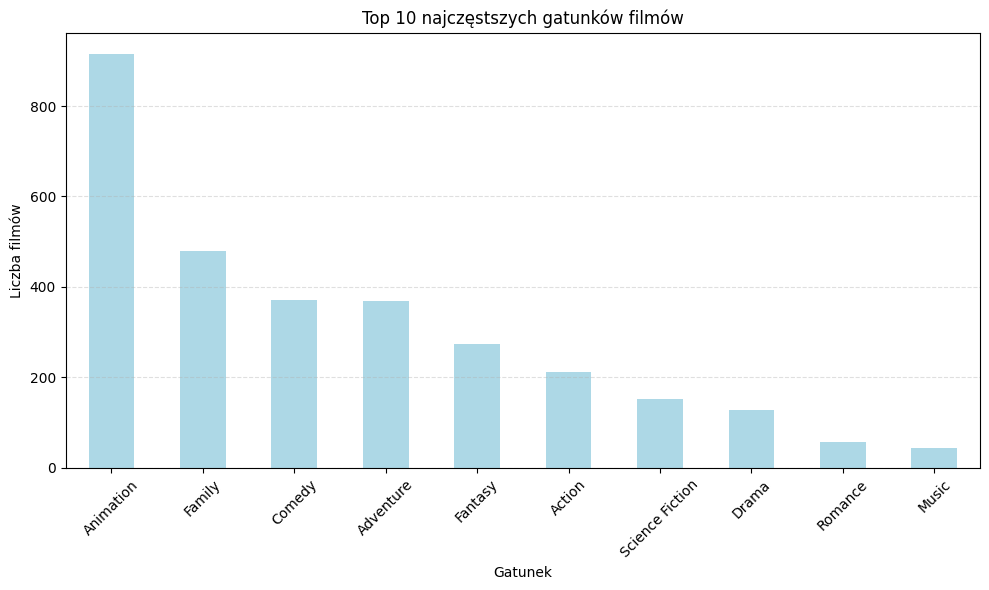

In [42]:
genres_counts = (
    df['genres'].dropna()
    .str.replace('\n', '', regex=True)  
    .str.split(',')                     
    .explode()                          
    .str.strip()                        
    .str.title()                      
)

top_genres = genres_counts.value_counts().head(10)

plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='lightblue')
plt.title('Top 10 najczęstszych gatunków filmów')
plt.xlabel('Gatunek')
plt.ylabel('Liczba filmów')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



Tak wygląda rozkład gatunków filmów w tym data secie. Najwięcej znalazło się w nim animacji, a najmniej musicali. 

# Dwa wykresy

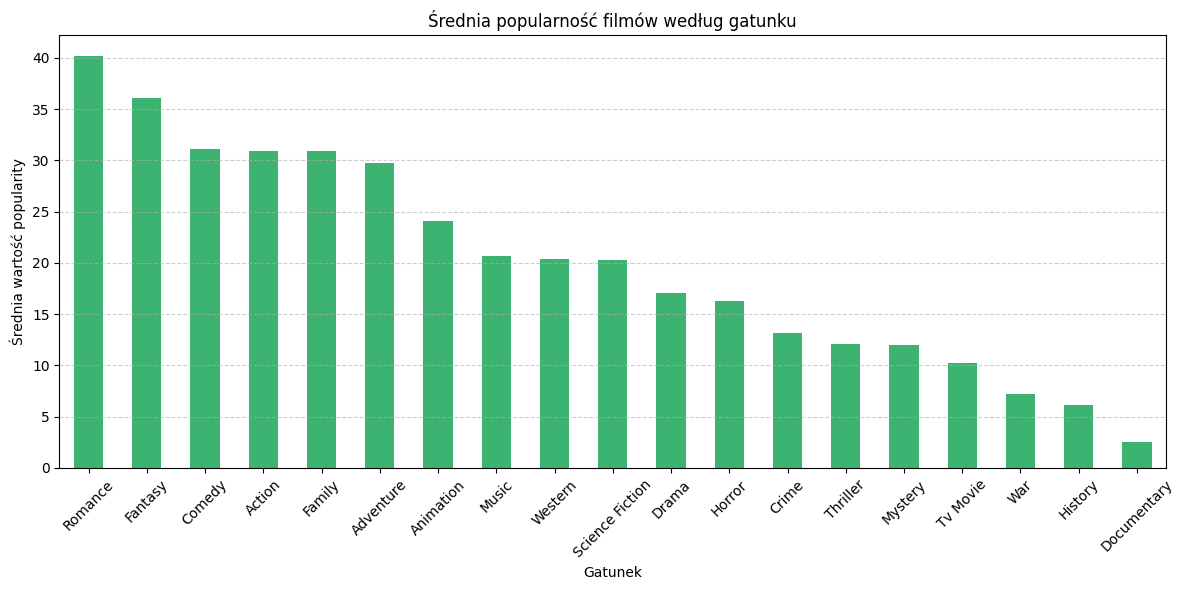

In [37]:
df_clean = df[['genres', 'popularity']].dropna()

df_clean['genres'] = (
    df_clean['genres']
    .str.replace('\n', '', regex=True)
    .str.split(',')
)

df_exploded = df_clean.explode('genres')
df_exploded['genres'] = df_exploded['genres'].str.strip().str.title()

avg_popularity = df_exploded.groupby('genres')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_popularity.plot(kind='bar', color='mediumseagreen')
plt.title('Średnia popularność filmów według gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Średnia popularność')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Warto zaznaczyć, że do tego wykresu zebrałem wszystkie gatunki, które były wymienione przy filmie, co oznacza, że "główny" gatunek dostaje taką samą popularność jak reszta. Najbardziej popularnymi gatunkami okazały się romans i fantastyka, a najmniej popularnymi filmy dokumentalne i historyczne.

/var/folders/dg/63998mws177d9vgc2gjjsp640000gn/T/ipykernel_83070/488921266.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='year', y='runtime', palette='muted')


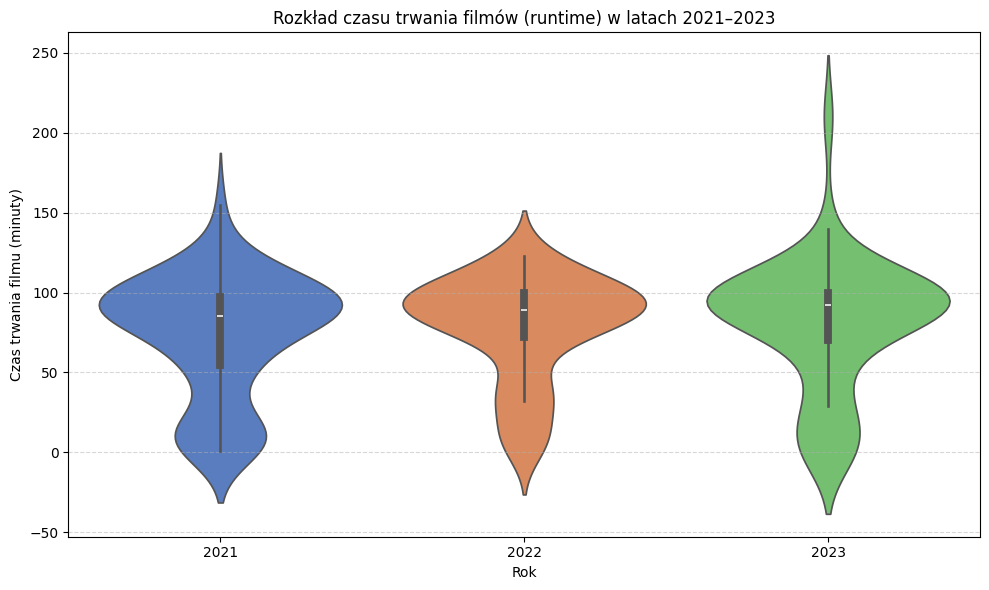

In [48]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


df['year'] = df['release_date'].dt.year


filtered_df = df[(df['year'] >= 2021) & (df['year'] <= 2023)]


filtered_df = filtered_df.dropna(subset=['runtime'])


plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_df, x='year', y='runtime', palette='muted')
plt.title('Rozkład czasu trwania filmów (runtime) w latach 2021–2023')
plt.xlabel('Rok')
plt.ylabel('Czas trwania filmu (minuty)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Jak widać większość filmów trwa około 90 minut. Widać też, że w 2023 roku było parę bardzo długich filmów. <br>
Aha i nie wiem dlaczego są ujemne wartości czasu trwania `¯\_(ツ)_/¯`